编制程序分别  
samples_generator.make_moons()函数、  
samples_generator.make_circles()函数、  
samples_generator.make_blobs()函数  
与np.random.randn()函数生成相应数据集，  
使用k均值算法、  
DBSCAN算法、  
Agglomerative聚类算法对不同形状数据集进行聚类，  
并对聚类结果进行可视化比较  

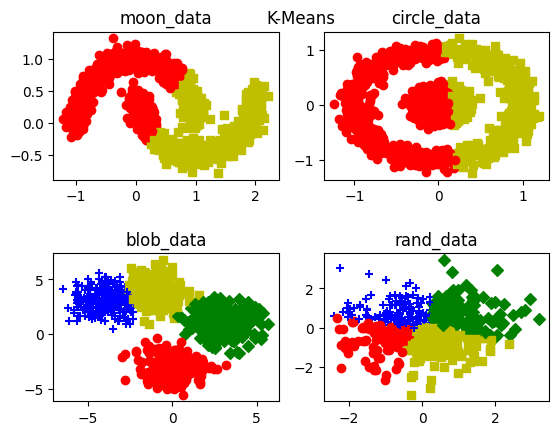

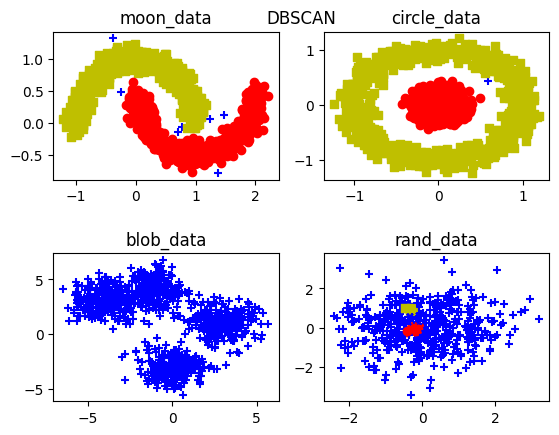

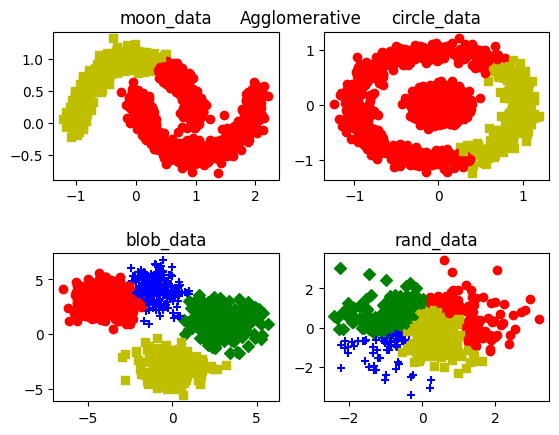

In [34]:
from sklearn.datasets._samples_generator import make_moons, make_circles, make_blobs
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

x1, lab1 = make_moons(n_samples=1000, noise=0.1)
x2, lab2 = make_circles(n_samples=1500, factor=0.2, noise=0.1)
x3, lab3 = make_blobs(n_samples=1000, centers=[[3,1],[-1,4],[0,-3],[-4,3]],n_features=2,cluster_std=1,random_state=0)
x4 = np.random.randn(500, 2)

data_names = ["moon_data", "circle_data", "blob_data", "rand_data"]
model_names = ["K-Means", "DBSCAN", "Agglomerative"]
clu_models = [
            KMeans(n_clusters=2, init='k-means++', max_iter=10, n_init=1),
            DBSCAN(eps=0.15, min_samples=10),
            AgglomerativeClustering(linkage="ward", n_clusters=2)
            ]

for model_index, model in enumerate(clu_models):
    model_name = model_names[model_index]
    plt.figure()
    plt.title(model_name)
    plt.axis('off')
    colors = ['r','y','g','b']
    markers = ['o','s','D','+']
    for data_index, data in enumerate([x1, x2, x3, x4]):
        data_name = data_names[data_index]
        # 调整簇数量
        if (model_index != 1 and data_index >1):
            model.n_clusters=4
        # 运用聚类算法
        model.fit(data)
        labels = model.labels_
        plt.subplot(2,2,data_index+1)
        plt.subplots_adjust(hspace=0.5)
        plt.title(data_name)
        for i, (x,y) in enumerate(data):
            plt.scatter(x, y, c=colors[(labels[i])%4], marker=markers[(labels[i])%4])
    plt.show()